Часть 1

1. Найти датасет (например, на сайте РосСтат https://rosstat.gov.ru/free_doc/new_site/zdor22/PublishSite_2022/index.html), распределение данных в котором было бы близко к

a) нормальному (визуально выглядит как кривая Гаусса - «колокол»), \
б) равномерному. 

2. Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной. 

3. Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),
дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### Нормальное распределение со смещенной медианой

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [31]:
df = pd.read_csv('house.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
mean = df['SalePrice'].mean()
median = df['SalePrice'].median()
mode = df['SalePrice'].mode()

print(f'Среднее: {mean}, Медиана: {median}, Мода: {mode}')

Среднее: 180921.19589041095, Медиана: 163000.0, Мода: 0    140000
Name: SalePrice, dtype: int64


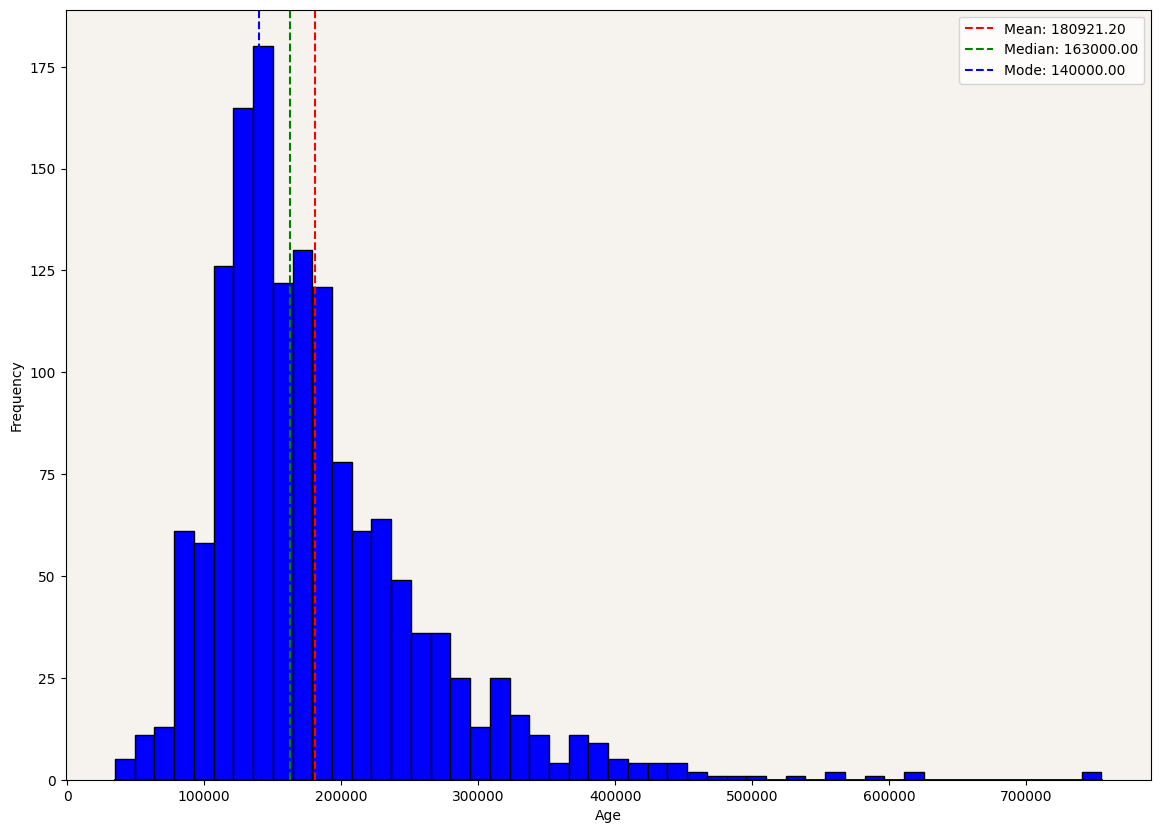

In [ ]:
plt.figure(figsize=(14, 10))

n, bins, patches = plt.hist(df['SalePrice'], bins=50, color='blue', edgecolor='black')

kde = stats.gaussian_kde(df['SalePrice'])
x = np.linspace(df['SalePrice'].min(), df['SalePrice'].max(), 1000)
plt.plot(x, kde(x), color='black', linewidth=2)

mean = np.mean(df['SalePrice'])
median = np.median(df['SalePrice'])
mode = stats.mode(df['SalePrice'], keepdims=True)[0][0]

plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(mode, color='b', linestyle='--', label=f'Mode: {mode:.2f}')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.gca().set_facecolor('#f6f3ee')
plt.legend()

plt.show()

### Нормальное распределение с несмещенной медианой

https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [19]:
df_t = pd.read_csv('titanic.csv')
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
mean = df_t['Age'].mean()
median = df['Age'].median()
mode = df['Age'].mode()

print(f'Среднее: {mean}, Медиана: {median}, Мода: {mode}')

Среднее: 29.69911764705882, Медиана: 28.0, Мода: 0    24.0
Name: Age, dtype: float64


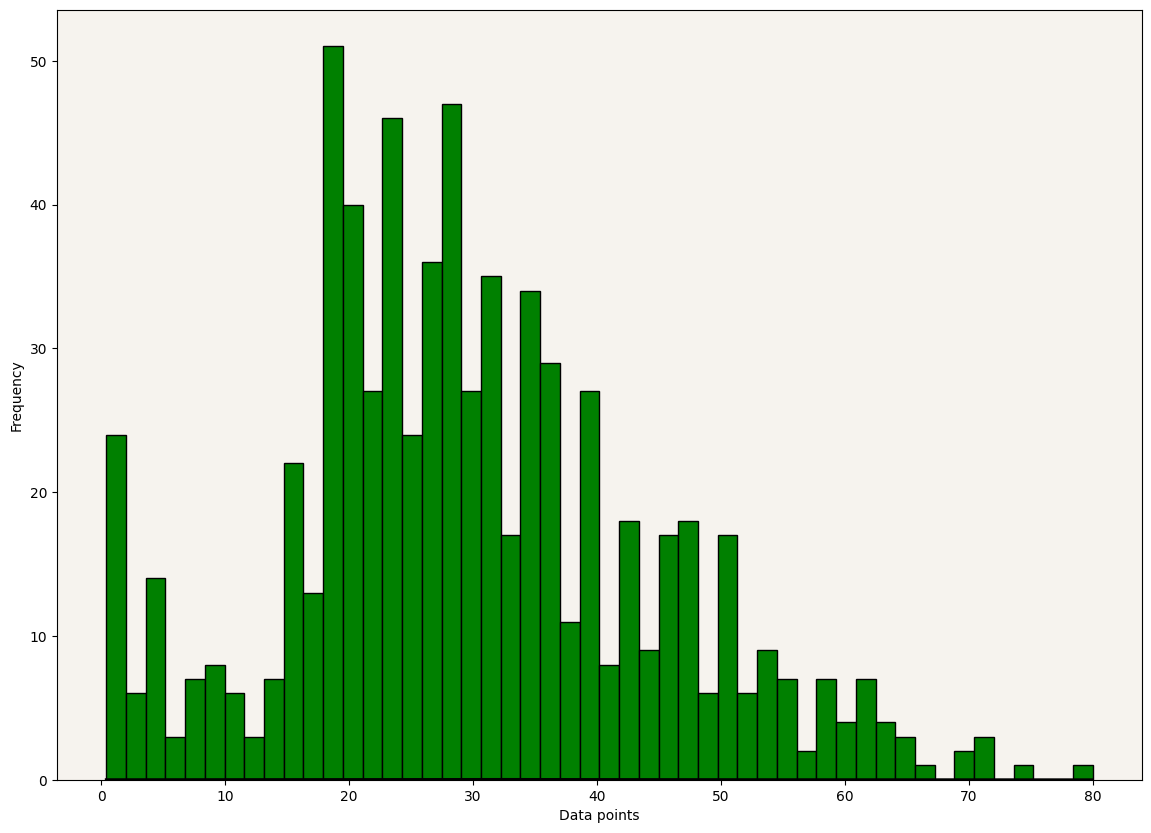

In [35]:
df_t_cleaned = df_t['Age'].replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(14, 10))

n, bins, patches = plt.hist(df_t_cleaned, bins=50, color='green', edgecolor='black')

kde = gaussian_kde(df_t_cleaned)
x = np.linspace(df_t_cleaned.min(), df_t_cleaned.max(), 1000)
plt.plot(x, kde(x), color='black', linewidth=2)

plt.xlabel('Data points')
plt.ylabel('Frequency')
plt.gca().set_facecolor('#f6f3ee')

plt.show()

### Равномерное распределение

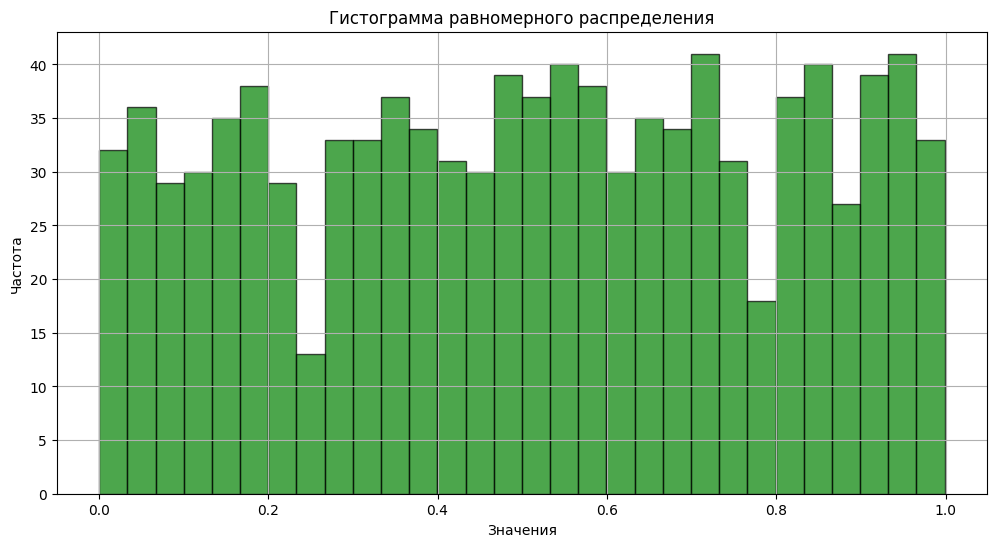

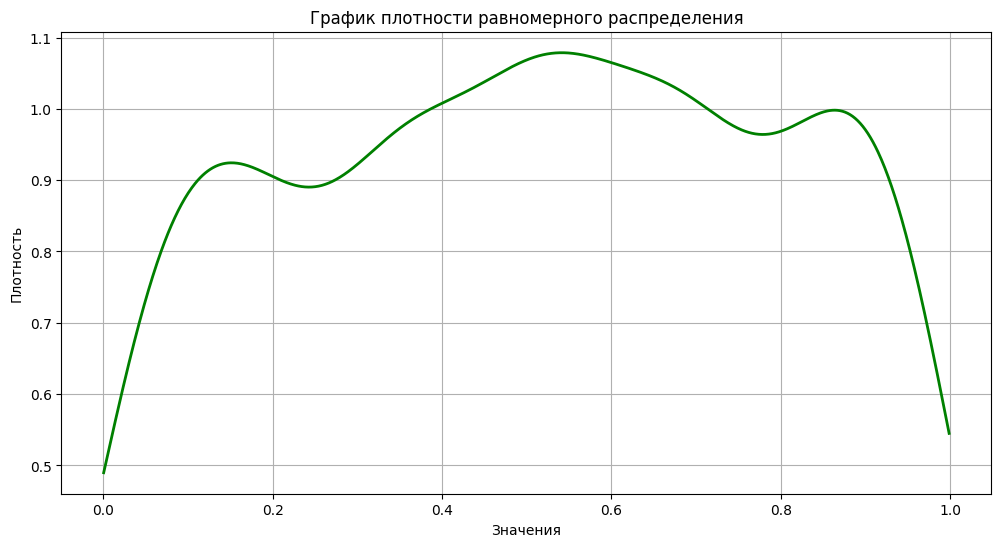

In [27]:
uniform_data = np.random.uniform(0, 1, 1000)

plt.figure(figsize=(12, 6))
plt.hist(uniform_data, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Гистограмма равномерного распределения')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
kde = gaussian_kde(uniform_data)
x = np.linspace(uniform_data.min(), uniform_data.max(), 1000)
plt.plot(x, kde(x), color='green', linewidth=2)
plt.title('График плотности равномерного распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()